In [1]:
#library yang dibutuhkan

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pkg_resources

ModuleNotFoundError: No module named 'cv2'

In [2]:
#membaca file dengan opencv
img = cv2.imread("rgb.jpg")

NameError: name 'cv2' is not defined

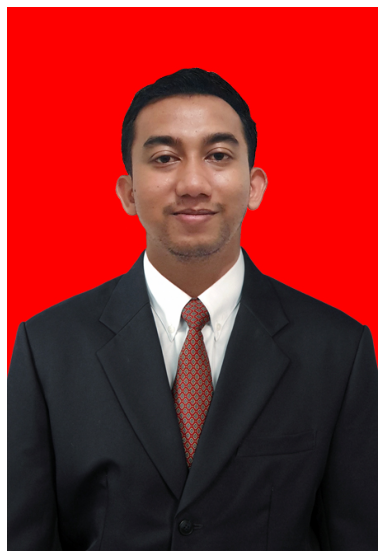

In [8]:
#Menampilkan hasil membaca file dengan matplotlib

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(img[:,:,::-1])

In [9]:
base_img = img.copy()

In [10]:
#Membuat fungsi blur menggunakan GaussianBlur

def blur_img(img, factor = 20):

    kW = int(img.shape[1] / factor)
    kH = int(img.shape[0] / factor)

    #ensure the shape of the kernel is odd
    if kW % 2 == 0: kW = kW - 1
    if kH % 2 == 0: kH = kH - 1
    
    blurred_img = cv2.GaussianBlur(img, (kW, kH), 0)
    return blurred_img

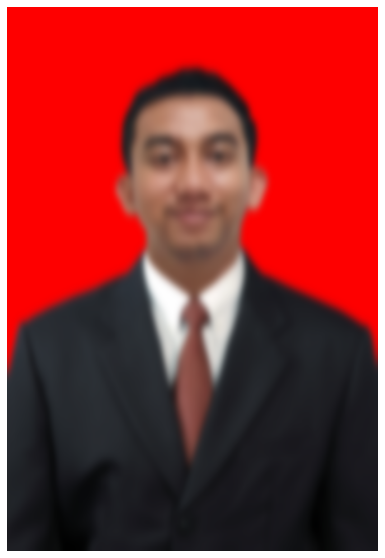

In [11]:
#Mencoba melakukan blur dengan fungsi yang telah dibuat

blurred_img = blur_img(img, factor = 20)
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(blurred_img[:,:,::-1])

In [12]:
#Mendeteksi wajah dengan bantuan library opencv

face_detector_path = pkg_resources.resource_filename('cv2', 'data/haarcascade_frontalface_default.xml')
face_detector = cv2.CascadeClassifier(face_detector_path)
faces = face_detector.detectMultiScale(img, 1.3, 5)

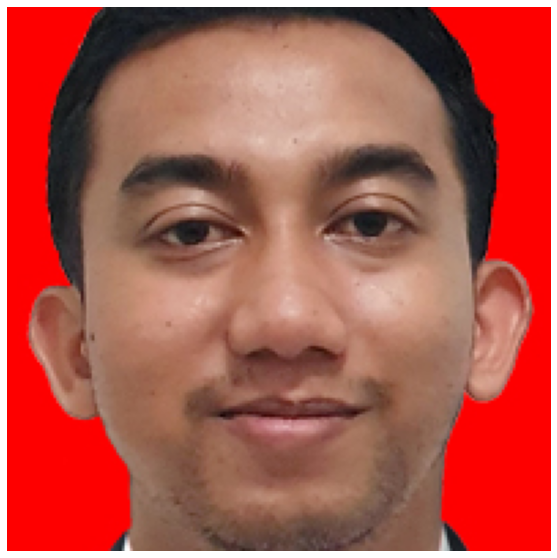

In [13]:
#Hasil deteksi wajah dengan opencv dilakukan cropping dan dilakukan blur
for x, y, w, h in faces:
    detected_face = img[int(y):int(y+h), int(x):int(x+w)]
    detected_face_blurred = blur_img(detected_face, factor = 3)
    
    plt.figure(figsize = (10,10))
    plt.axis('off')
    plt.imshow(detected_face[:,:,::-1])
    
    blurred_img[y:y+h, x:x+w] = detected_face
    base_img[y:y+h, x:x+w] = detected_face_blurred

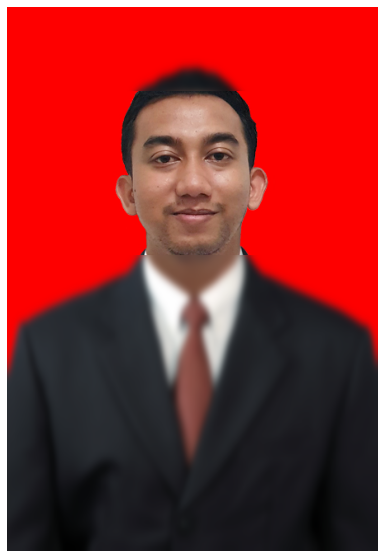

In [14]:
#Menampilkan hasil croping dan backrgound yang di blur

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(blurred_img[:,:,::-1])

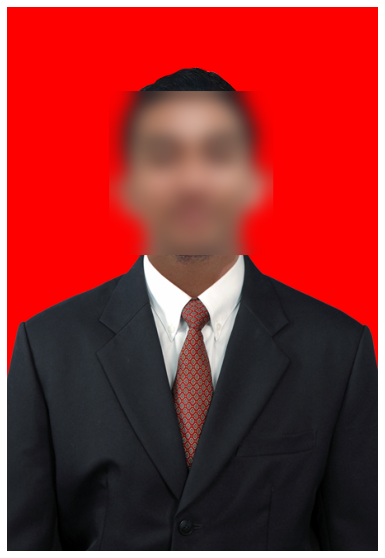

In [15]:
#Menampilkan hasil croping dan wajah yang di blur

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(base_img[:,:,::-1])

In [16]:
cv2.imwrite('FaceBlur.jpg', base_img)

True